# Reproduction of Figures from Paper

This notebook is a iPython (Jupyter-type) notebook for reproducing the figures from the original article using code developed in this repository.

In [1]:
import pandas as pd
import plotnine as pn
import itertools

from utils.filling import calc_nondim_fill_volume
from utils.squeezing import calc_alpha, calc_nondim_squeeze_volume

In [2]:
color_mapping = {
    '0.33': '#10f900',
    '0.67': '#21cd12',
    '1.0': '#25a918',
    '1.33': '#268b19',
    '2.0': '#246e18',
    '3.0': '#1f4f16'
}

## Filling and Squeezing

Figure 2 shows a) the non-dimensionalized volume for the filling phase and b) the squeezing coefficient.

### Filling

The first plot is non-dimensionalized fill volume, $\frac{V_{fill}}{hw^2}$, as a function of $\frac{h}{w}$ for the domain $[0, 0.5]$. Four width ratios of $\frac{w_{in}}{w} = [1, 1.33, 2, 3]$.

In [3]:
width = [1.]
heights = map(lambda x: float(x / 100), range(0, 51))
inlet_widths = [1, 4 / 3, 2, 3]

width_col = []
height_col = []
inlet_width_col = []
for width, height, inlet_width in itertools.product(width, heights,
                                                    inlet_widths):
    width_col.append(width)
    height_col.append(height)
    inlet_width_col.append(inlet_width)

filling_df = pd.DataFrame()
filling_df['width'] = width_col
filling_df['height'] = height_col
filling_df['inlet_width'] = inlet_width_col

filling_df['height_over_width'] = filling_df['height'] / filling_df['width']
filling_df['width_ratio'] = round(
    filling_df['inlet_width'] / filling_df['width'], 2)
filling_df['width_ratio'] = filling_df['width_ratio'].astype(str)

filling_df['nondim_vol'] = filling_df.apply(
    lambda row: calc_nondim_fill_volume(row.height, row.width, row.inlet_width
                                        ),
    axis=1)


/home/ken/personal/t-junction_model_reporoduction/env/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


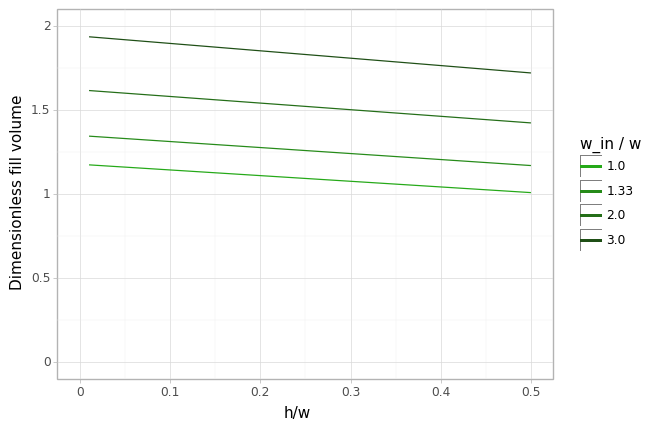

<ggplot: (8768600939469)>

In [4]:
(pn.ggplot(filling_df,
           pn.aes('height_over_width', 'nondim_vol', color='width_ratio')) +
 pn.geom_line() + pn.scale_color_manual(color_mapping) + pn.ylim(0, 2) +
 pn.theme_light() +
 pn.labs(x='h/w', y='Dimensionless fill volume', color='w_in / w'))


### Squeezing coefficient, $\alpha$

Next, the squeezing coefficient, $\alpha$, is shown as a function of $\frac{h}{w}$ for the domain $[0, 0.5]$. Six width ratios of $\frac{w_{in}}{w} = [0.33, 0.67, 1, 1.33, 2, 3]$.

In [5]:
width = [1.]
flow_ratio = 0.1
epsilon = 0.
heights = map(lambda x: float(x / 100), range(0, 51))
inlet_widths = [1 / 3, 2 / 3, 1, 4 / 3, 2, 3]

width_col = []
height_col = []
inlet_width_col = []
for width, height, inlet_width in itertools.product(width, heights,
                                                    inlet_widths):
    width_col.append(width)
    height_col.append(height)
    inlet_width_col.append(inlet_width)

alpha_df = pd.DataFrame()
alpha_df['width'] = width_col
alpha_df['height'] = height_col
alpha_df['inlet_width'] = inlet_width_col
alpha_df['epsilon'] = epsilon
alpha_df['flow_cont'] = 1.
alpha_df['flow_gutter'] = alpha_df['flow_cont'] * flow_ratio

alpha_df['height_over_width'] = alpha_df['height'] / alpha_df['width']
alpha_df['width_ratio'] = round(alpha_df['inlet_width'] / alpha_df['width'], 2)
alpha_df['width_ratio'] = alpha_df['width_ratio'].astype(str)

alpha_df['alpha'] = alpha_df.apply(
    lambda row: calc_alpha(row.height, row.width, row.inlet_width, row.epsilon,
                           row.flow_cont, row.flow_gutter),
    axis=1)


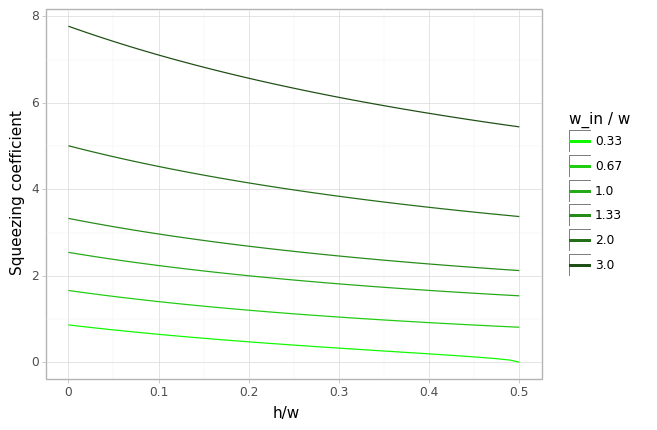

<ggplot: (8768600894353)>

In [6]:
(pn.ggplot(alpha_df, pn.aes('height_over_width', 'alpha', color='width_ratio'))
 + pn.geom_line() + pn.scale_color_manual(color_mapping) + pn.theme_light() +
 pn.labs(x='h/w', y='Squeezing coefficient', color='w_in / w'))


## Dimensionless Volume

Figure 3 shows the dimensionless volume of droplets as a function of the flow rate ratio between the dispersed and continuous phases, $\frac{q_d}{q_c}$ on the domain $[0, 10]$. Five width ratios of $\frac{w_{in}}{w} = [0.33, 0.67, 1, 1.33, 3]$.

In [7]:
continuous_flow = 1.
gutter_flow = continuous_flow * 0.1
width = 1.
inlet_widths = [1 / 3, 2 / 3, 1, 4 / 3, 3]
dispersed_flows = map(lambda x: float(x / 10), range(0, 101))

# h/w is assigned based on width ratio
height_dictionary = {
    '0.33': 1 / 3,
    '0.67': 0.11,
    '1.0': 1 / 3,
    '1.33': 0.17,
    '3.0': 1 / 3
}

inlet_width_col = []
dispersed_flow_col = []
for inlet_width, dispersed_flow in itertools.product(inlet_widths,
                                                     dispersed_flows):
    inlet_width_col.append(inlet_width)
    dispersed_flow_col.append(dispersed_flow)

vol_df = pd.DataFrame()
vol_df['inlet_width'] = inlet_width_col
vol_df['dispersed_flow'] = dispersed_flow_col
vol_df['width'] = width
vol_df['continuous_flow'] = continuous_flow
vol_df['gutter_flow'] = gutter_flow

vol_df['epsilon'] = 0.1 * vol_df['width']
vol_df['flow_ratio'] = vol_df['dispersed_flow'] / vol_df['continuous_flow']
vol_df['width_ratio'] = round(vol_df['inlet_width'] / vol_df['width'], 2)
vol_df['width_ratio'] = vol_df['width_ratio'].astype(str)
vol_df['height'] = vol_df.apply(
    lambda row: height_dictionary.get(row.width_ratio), axis=1)
vol_df['fill_vol'] = vol_df.apply(lambda row: calc_nondim_fill_volume(
    row.height, row.width, row.inlet_width),
                                  axis=1)
vol_df['squeeze_vol'] = vol_df.apply(lambda row: calc_nondim_squeeze_volume(
    row.height, row.width, row.inlet_width, row.epsilon, row.continuous_flow,
    row.dispersed_flow, row.gutter_flow),
                                     axis=1)
vol_df['vol'] = vol_df['fill_vol'] + vol_df['squeeze_vol']

/home/ken/personal/t-junction_model_reporoduction/env/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 66 rows containing missing values.


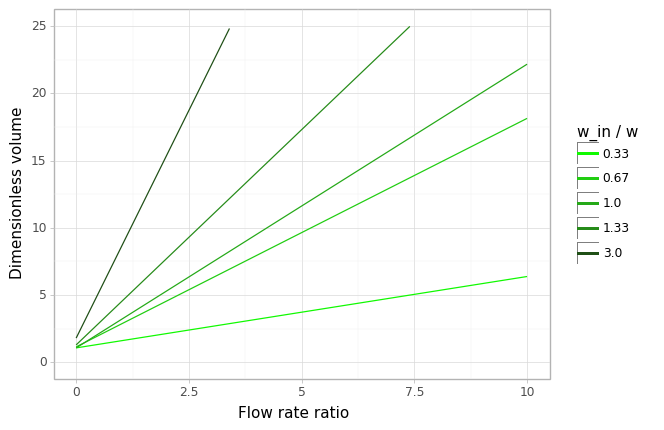

<ggplot: (8768601056933)>

In [8]:
(pn.ggplot(vol_df, pn.aes('flow_ratio', 'vol', color='width_ratio')) +
 pn.geom_line() + pn.scale_color_manual(color_mapping) + pn.ylim(0, 25) +
 pn.theme_light() +
 pn.labs(x='Flow rate ratio', y='Dimensionless volume', color='w_in / w'))
